All of the next content is taken from [link](http://alexanderdemos.org/Mixed2.html)

In [2]:
#Set seed so your answers are all the same
set.seed(9)
# Sample Per class room people
n1 <- 20; n2 <- 20; n3 <- 20; n4 <- 20
N<-n1+n2+n3+n4 # Total N
# Uniform distrobution of proportion of time per classroom
X1 <- runif(n1,  0, .35)
X2 <- runif(n2, .3, .55)
X3 <- runif(n3, .5, .75)
X4 <- runif(n4, .7,1.0)
# noise per classroom
e1 <- rnorm(n1, 0, sd=2.5)
e2 <- rnorm(n2, 0, sd=2.5)
e3 <- rnorm(n3, 0, sd=2.5)
e4 <- rnorm(n4, 0, sd=2.5)
# Intercepts per classroom
B0.1 <- 80
B0.2 <- 70
B0.3 <- 60
B0.4 <- 50
# Same slope per classroom
B1=10
# Our equation to  create Y for each classroom
Y1 = B1*scale(X1,scale=F)  + B0.1 + e1
Y2 = B1*scale(X2,scale=F)  + B0.2 + e2
Y3 = B1*scale(X3,scale=F)  + B0.3 + e3
Y4 = B1*scale(X4,scale=F)  + B0.4 + e4
# Merge classrooms into 1 data.frame
Math.Data<-data.frame(Math=c(Y1,Y2,Y3,Y4),ActiveTime=c(X1,X2,X3,X4),
                      Classroom=c(rep("C1",n1),rep("C2",n2),rep("C3",n3),rep("C4",n4)),
                      StudentID=as.factor(1:N))


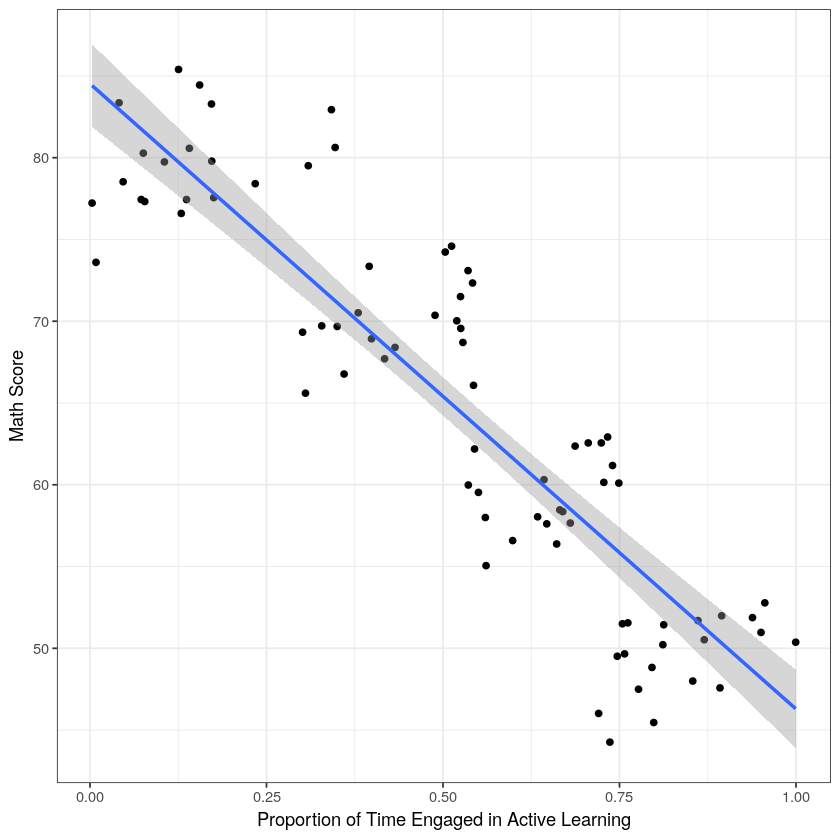

In [3]:
library(ggplot2)
theme_set(theme_bw())
ClassRoom.Plot.1 <-ggplot(data = Math.Data, 
                          aes(x = ActiveTime, y=Math))+ #scaffold
  geom_point()+ # add layer of scatterplot
  geom_smooth(method = "lm", se = TRUE)+ # add regression line
  xlab("Proportion of Time Engaged in Active Learning")+
  ylab("Math Score") # add labels
ClassRoom.Plot.1 #call plot

In [5]:
library(stargazer)
Class.All<-lm(Math~ActiveTime, data = Math.Data)
stargazer(Class.All,type="text",
          intercept.bottom = FALSE, single.row=TRUE, 
          star.cutoffs=c(.05,.01,.001), notes.append = FALSE,
          header=FALSE)


                         Dependent variable:     
                    -----------------------------
                                Math             
-------------------------------------------------
Constant                  84.522*** (1.274)      
ActiveTime               -38.234*** (2.180)      
-------------------------------------------------
Observations                     80              
R2                              0.798            
Adjusted R2                     0.795            
Residual Std. Error        5.263 (df = 78)       
F Statistic            307.720*** (df = 1; 78)   
Note:               *p<0.05; **p<0.01; ***p<0.001


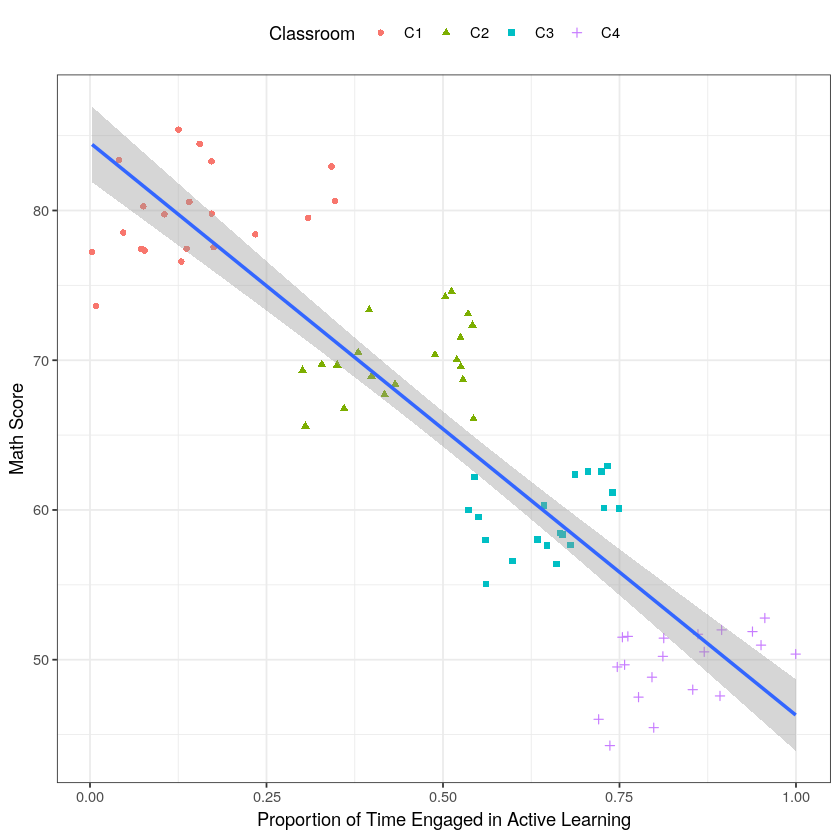

In [6]:
ClassRoom.Plot.2 <-ggplot(data = Math.Data, 
                          aes(x = ActiveTime, y=Math))+
  geom_point(aes(colour = Classroom, shape=Classroom))+ # we add color by cluster
  geom_smooth(method = "lm", se = TRUE)+
  xlab("Proportion of Time Engaged in Active Learning")+
  ylab("Math Score")+ # add labels
  theme(legend.position = "top")
ClassRoom.Plot.2

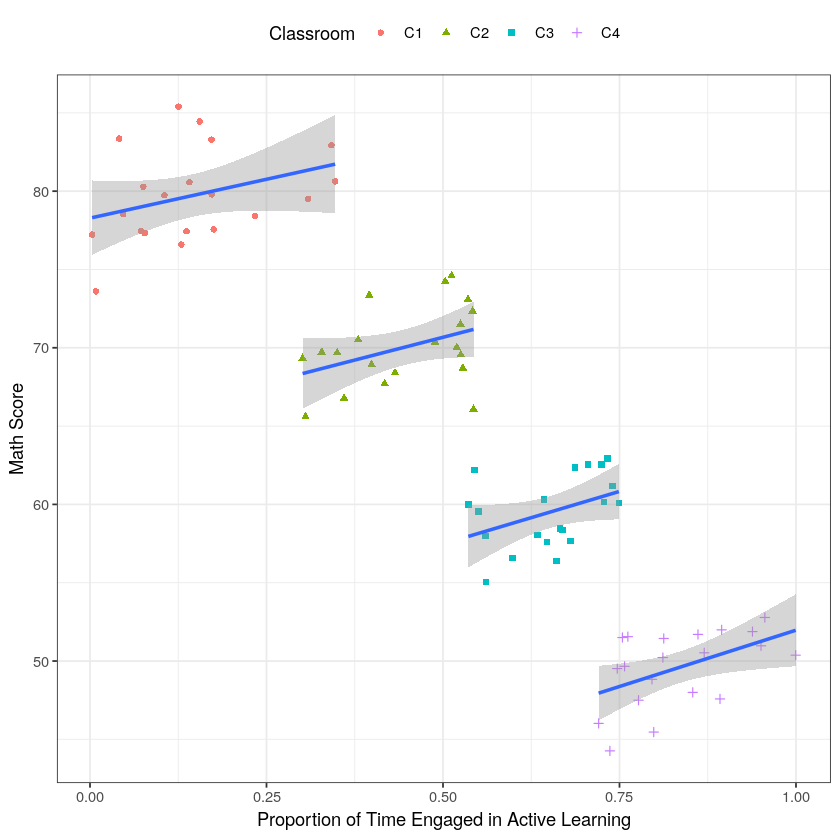

In [7]:
ClassRoom.Plot <-ggplot(data = Math.Data, 
                        aes(x = ActiveTime, y=Math))+ 
  geom_point(aes(colour = Classroom, shape=Classroom))+
  geom_smooth(method = "lm", se = TRUE, aes(group = Classroom))+# we add group level
  xlab("Proportion of Time Engaged in Active Learning")+ylab("Math Score")+ # add labels
  theme(legend.position = "top")
ClassRoom.Plot

In [9]:
Class1<-lm(Math~ActiveTime, data = subset(Math.Data,Classroom=="C1"))
Class2<-lm(Math~ActiveTime, data = subset(Math.Data,Classroom=="C2"))
Class3<-lm(Math~ActiveTime, data = subset(Math.Data,Classroom=="C3"))
Class4<-lm(Math~ActiveTime, data = subset(Math.Data,Classroom=="C4"))

stargazer(Class1,Class2,Class3,Class4,type="text",
          intercept.bottom = FALSE, single.row=TRUE, 
          star.cutoffs=c(.05,.01,.001), notes.append = FALSE,
          header=FALSE)


                                                        Dependent variable:                          
                              -----------------------------------------------------------------------
                                                               Math                                  
                                     (1)               (2)               (3)               (4)       
-----------------------------------------------------------------------------------------------------
Constant                      78.279*** (1.147) 64.851*** (2.902) 50.764*** (4.596) 37.586*** (4.981)
ActiveTime                      9.922 (6.592)    11.638 (6.414)    13.421 (7.021)    14.382* (5.942) 
-----------------------------------------------------------------------------------------------------
Observations                         20                20                20                20        
R2                                  0.112             0.155             0.169    

In [13]:
intercepts.Math.Data<-unname(c(Class1$coef[1],Class2$coef[1],
                               Class3$coef[1],Class4$coef[1]))
M.Intercept<-mean(intercepts.Math.Data)
SD.Intercept<-sd(intercepts.Math.Data)
library(apa)
t.intercept.Math.Data<-t_apa(t.test(intercepts.Math.Data), print=TRUE)

t(3) = 6.58, p = .007, d = 3.29

In [23]:
Slope.Math.Data<-unname(c(Class1$coef[2],Class2$coef[2],
                          Class3$coef[2],Class4$coef[2]))
M.Slope<-mean(Slope.Math.Data)
SD.Slopet<-sd(Slope.Math.Data)
t.Slope.Math.Data<-t_apa(t.test(Slope.Math.Data), print=TRUE)

t(3) = 12.51, p = .001, d = 6.25

In [25]:
#Functions for fishers transforms
FisherRtoZ <-function(r) {.5*((log(1+r)-log(1-r)))}
FisherZtoR <-function(z) {tanh(z)}

R2.Math.Data<-FisherRtoZ(c(summary(Class1)$r.squared^.5,summary(Class2)$r.squared^.5,
                           summary(Class3)$r.squared^.5,summary(Class4)$r.squared^.5))
M.R2<-FisherZtoR(mean(R2.Math.Data))^2
SD.R2<-FisherZtoR(sd(R2.Math.Data))^2
t.R2.Math.Data<-t_apa(t.test(R2.Math.Data), print=TRUE)

t(3) = 10.74, p = .002, d = 5.37

In [26]:
### Rescale DV
library(plyr)
# Create a new variable in the data which is the mean of Math Score per class room (at each subject)
Math.Data<-ddply(Math.Data,.(Classroom), mutate, ClassMeanMath = mean(Math))
# next we center relative to each student relative to their class Math mean (how much to they differ from their cohort)
Math.Data$Math.Class.Centered<-Math.Data$Math-Math.Data$ClassMeanMath

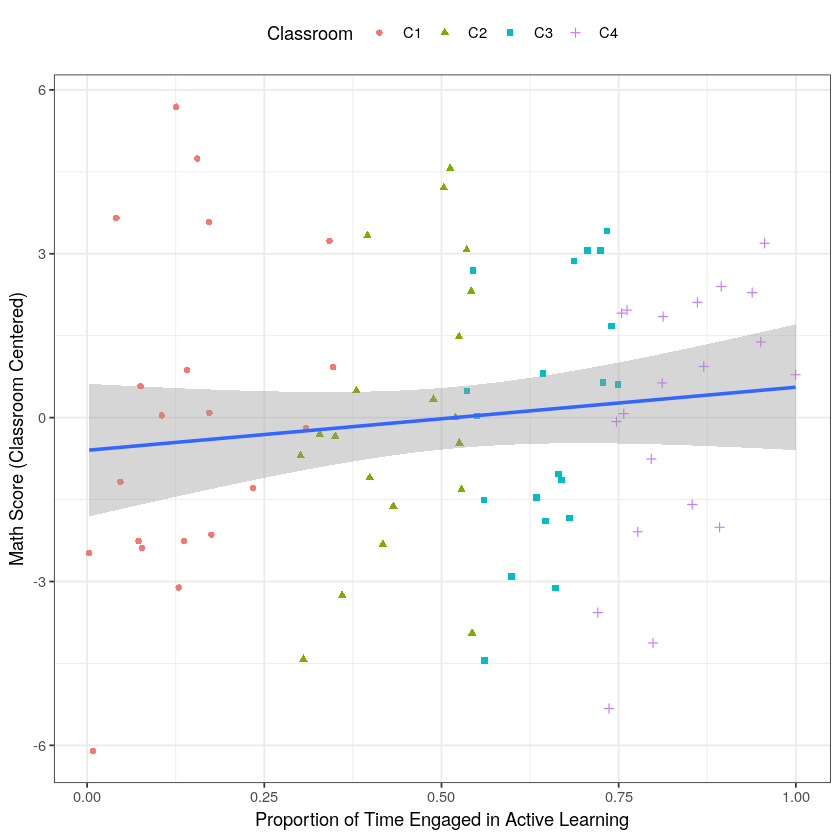

In [27]:
ClassRoom.Plot.3 <-ggplot(data = Math.Data, aes(x = ActiveTime, y=Math.Class.Centered))+ 
  geom_point(aes(colour = Classroom, shape=Classroom))+
  geom_smooth(method = "lm", se = TRUE)+# we add group level
  xlab("Proportion of Time Engaged in Active Learning")+
  ylab("Math Score (Classroom Centered)")+
  theme(legend.position = "top")
ClassRoom.Plot.3

In [29]:
Class.All.C<-lm(Math.Class.Centered~ActiveTime, data = Math.Data)
stargazer(Class.All.C,type="text",
          intercept.bottom = FALSE, single.row=TRUE, 
          star.cutoffs=c(.05,.01,.001), notes.append = FALSE,
          header=FALSE)


                         Dependent variable:     
                    -----------------------------
                         Math.Class.Centered     
-------------------------------------------------
Constant                   -0.599 (0.612)        
ActiveTime                  1.155 (1.047)        
-------------------------------------------------
Observations                     80              
R2                              0.015            
Adjusted R2                     0.003            
Residual Std. Error        2.529 (df = 78)       
F Statistic              1.216 (df = 1; 78)      
Note:               *p<0.05; **p<0.01; ***p<0.001


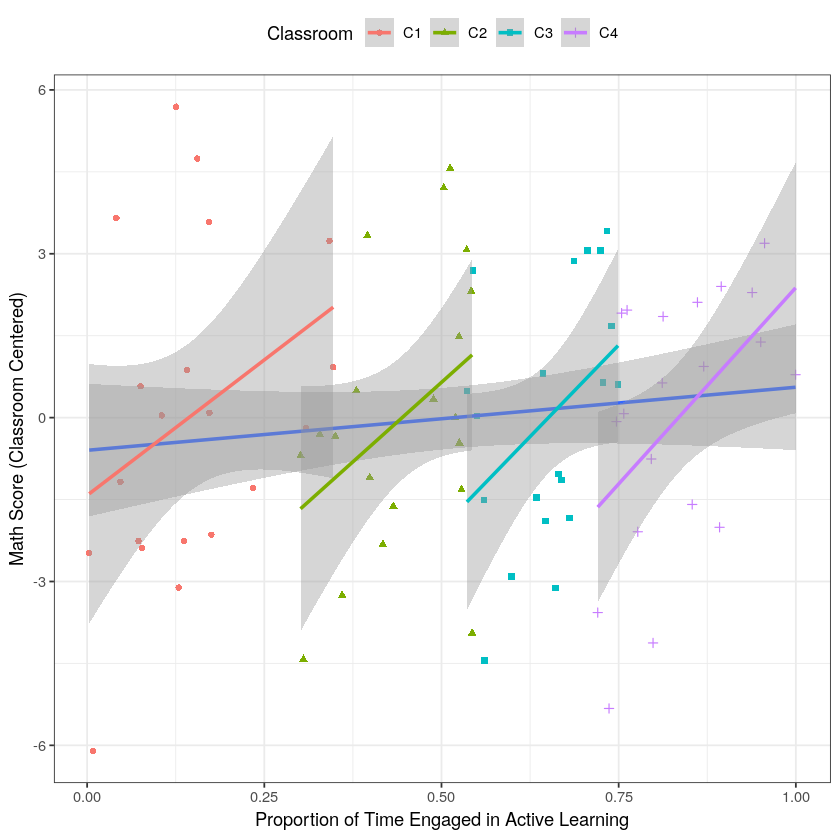

In [30]:
ClassRoom.Plot.4 <-ggplot(data = Math.Data, 
                          aes(x = ActiveTime, y=Math.Class.Centered))+ 
  geom_point(aes(colour = Classroom, shape=Classroom))+
  geom_smooth(method = "lm", se = TRUE)+# we add group level
  geom_smooth(method = "lm", se = TRUE, aes(group = Classroom, color=Classroom))+
  xlab("Proportion of Time Engaged in Active Learning")+
  ylab("Math Score (Classroom Centered)")+ # add labels
  theme(legend.position = "top")
ClassRoom.Plot.4

In [49]:
### Rescale IV
Math.Data<-ddply(Math.Data,.(Classroom), mutate, ClassActiveTime = mean(ActiveTime))
Math.Data$ActiveTime.Class.Centered<-Math.Data$ActiveTime-Math.Data$ClassActiveTime

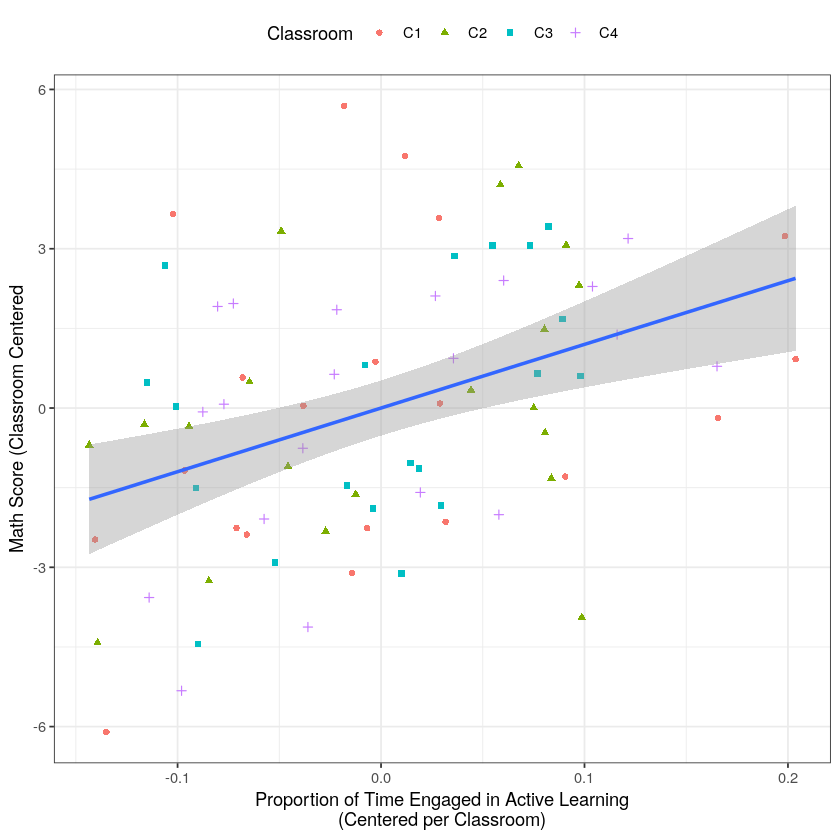

In [50]:
ClassRoom.Plot.5 <-ggplot(data = Math.Data, 
                          aes(x = ActiveTime.Class.Centered, y=Math.Class.Centered))+ 
  geom_point(aes(colour = Classroom, shape=Classroom))+
  geom_smooth(method = "lm", se = TRUE)+# we add group level
  xlab("Proportion of Time Engaged in Active Learning\n(Centered per Classroom)")+
  ylab("Math Score (Classroom Centered")+ # add labels
  theme(legend.position = "top")
ClassRoom.Plot.5

In [51]:
Class.All.C2<-lm(Math.Class.Centered~ActiveTime.Class.Centered, data = Math.Data)
stargazer(Class.All.C2,type="text",
          intercept.bottom = FALSE, single.row=TRUE, 
          star.cutoffs=c(.05,.01,.001), notes.append = FALSE,
          header=FALSE)


                               Dependent variable:     
                          -----------------------------
                               Math.Class.Centered     
-------------------------------------------------------
Constant                         -0.000 (0.261)        
ActiveTime.Class.Centered       11.990*** (3.119)      
-------------------------------------------------------
Observations                           80              
R2                                    0.159            
Adjusted R2                           0.149            
Residual Std. Error              2.337 (df = 78)       
F Statistic                  14.781*** (df = 1; 78)    
Note:                     *p<0.05; **p<0.01; ***p<0.001


In [52]:
library(lme4)     #mixed model package by Douglas Bates et al
Model.Null<-lmer(Math ~1+(1|Classroom),  
                   data=Math.Data, REML=FALSE)
summary(Model.Null)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: Math ~ 1 + (1 | Classroom)
   Data: Math.Data

     AIC      BIC   logLik deviance df.resid 
   408.6    415.7   -201.3    402.6       77 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.34755 -0.72263  0.01011  0.73079  2.21975 

Random effects:
 Groups    Name        Variance Std.Dev.
 Classroom (Intercept) 126.884  11.264  
 Residual                6.668   2.582  
Number of obs: 80, groups:  Classroom, 4

Fixed effects:
            Estimate Std. Error t value
(Intercept)    64.70       5.64   11.47

In [53]:
ranef(Model.Null)

$Classroom
   (Intercept)
C1   14.959676
C2    5.307215
C3   -5.190059
C4  -15.076832

with conditional variances for “Classroom” 

In [54]:
ICC.Model<-function(Model.Name) {
  tau.Null<-as.numeric(lapply(summary(Model.Name)$varcor, diag))
  sigma.Null <- as.numeric(attr(summary(Model.Name)$varcor, "sc")^2)
  ICC.Null <- tau.Null/(tau.Null+sigma.Null)
  return(ICC.Null)
}
ICC.Model(Model.Null)

[1] 0.9500716

Sorting each group of random effects ('sort.all') is not possible when 'facets = TRUE'.


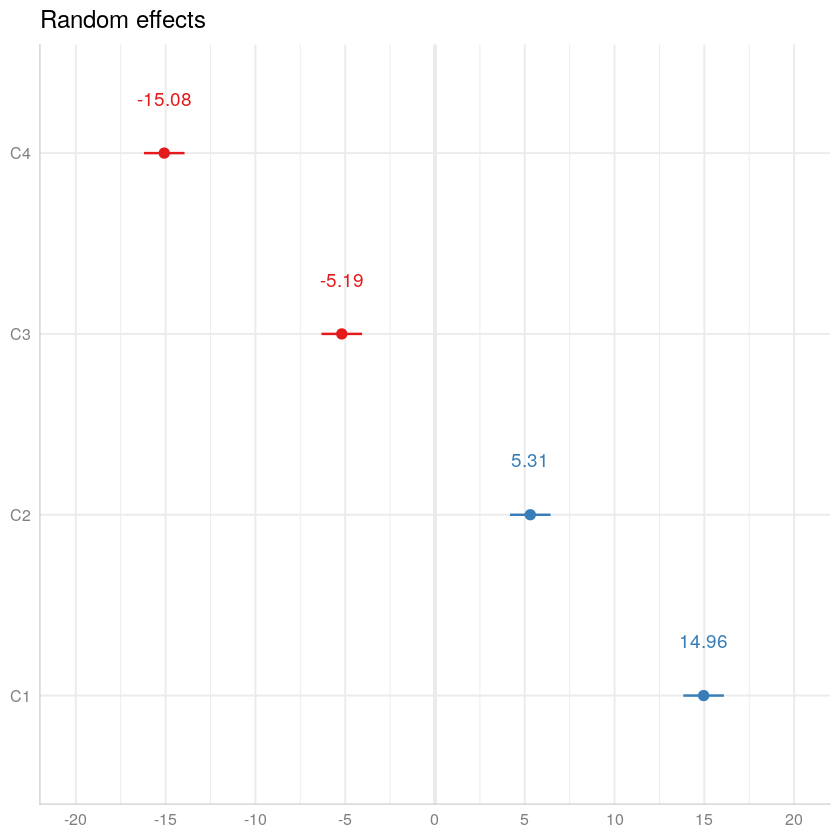

In [79]:
library(sjPlot)
library(sjmisc)
library(sjlabelled)
plot_model(Model.Null,
         sort.est = "sort.all",
           type='re',show.values = TRUE, value.offset = .3)


In [80]:
Model.1<-lmer(Math ~ActiveTime+(1|Classroom),  
                   data=Math.Data, REML=FALSE)
summary(Model.1)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: Math ~ ActiveTime + (1 | Classroom)
   Data: Math.Data

     AIC      BIC   logLik deviance df.resid 
   399.3    408.8   -195.6    391.3       76 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.13111 -0.77650 -0.04481  0.61218  2.50097 

Random effects:
 Groups    Name        Variance Std.Dev.
 Classroom (Intercept) 200.00   14.142  
 Residual                5.61    2.368  
Number of obs: 80, groups:  Classroom, 4

Fixed effects:
            Estimate Std. Error t value
(Intercept)   58.862      7.261   8.107
ActiveTime    11.269      3.140   3.589

Correlation of Fixed Effects:
           (Intr)
ActiveTime -0.224

Sorting each group of random effects ('sort.all') is not possible when 'facets = TRUE'.


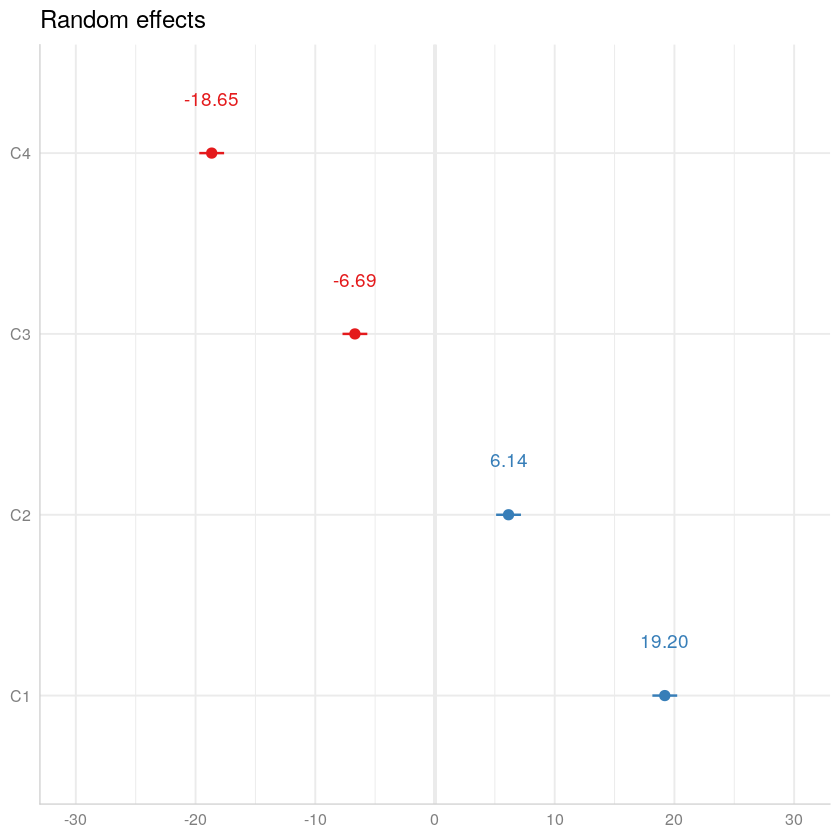

In [82]:
plot_model(Model.1,
         sort.est = "sort.all",
           type='re',show.values = TRUE, value.offset = .3)



Loading required package: carData
lattice theme set by effectsTheme()
See ?effectsTheme for details.


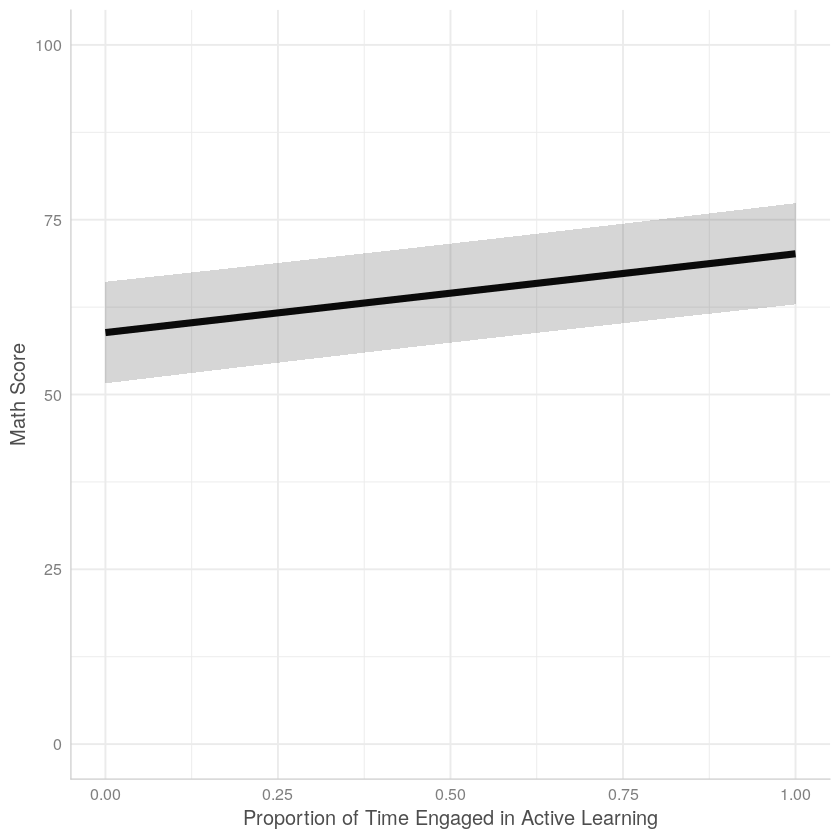

In [83]:
library(effects)
Results.Model.1<-Effect(c("ActiveTime"),Model.1,
     xlevels=list(ActiveTime=seq(0,1,.2)))
     
Results.Model.1<-as.data.frame(Results.Model.1)

Final.Fixed.Plot.1 <-ggplot(data = Results.Model.1, 
                            aes(x = ActiveTime, y =fit))+
  geom_line(size=2)+
  coord_cartesian(xlim = c(0, 1),ylim = c(0, 100))+ 
  geom_ribbon(aes(ymin=fit-se, ymax=fit+se),alpha=.2)+
  xlab("Proportion of Time Engaged in Active Learning")+
  ylab("Math Score")+ 
  theme(legend.position = "none")
Final.Fixed.Plot.1

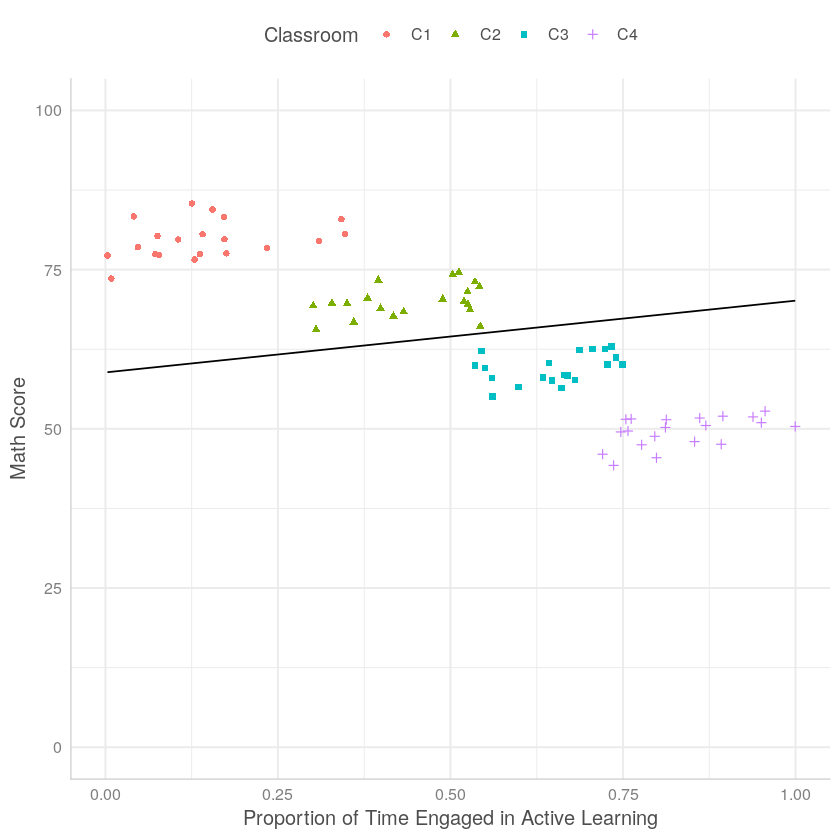

In [84]:
#Fixed only, removed random effects
Math.Data$Model.1.Fitted<-predict(Model.1, re.form=NA)
     
ClassRoom.Plot.Bad <-ggplot(data = Math.Data)+ 
  coord_cartesian(xlim = c(0, 1),ylim = c(0, 100))+ 
  geom_point( aes(x = ActiveTime, y=Math, 
                                   colour = Classroom, shape=Classroom))+
  geom_line(aes(x = ActiveTime, y=Model.1.Fitted))+
  xlab("Proportion of Time Engaged in Active Learning")+
  ylab("Math Score")+ 
  theme(legend.position = "top")
ClassRoom.Plot.Bad

In [91]:
# r.squared <- function(mdl){
#   UseMethod("r.squared")
# }
# rsquared.glmm <- function(modlist) {
#   if( class(modlist) != "list" ) modlist = list(modlist) else modlist
#   # Iterate over each model in the list
#   do.call(rbind, lapply(modlist, r.squared))
# }
source("https://raw.githubusercontent.com/jslefche/rsquared.glmm/master/rsquaredglmm.R")
rsquared.glmm(Model.1)

Class,Family,Link,Marginal,Conditional,AIC
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
lmerMod,gaussian,identity,0.04359629,0.9739072,399.2721


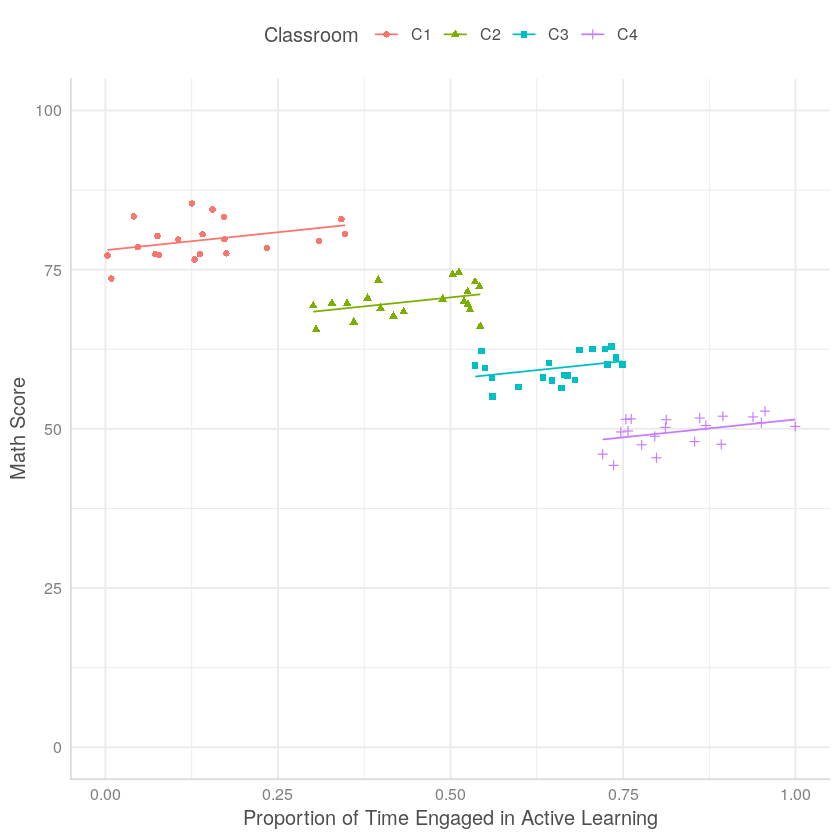

In [92]:
# Fixed + Random effects
Math.Data$Model.1.Fitted.Random<-predict(Model.1) 
     
ClassRoom.Plot.Better <-ggplot(data = Math.Data)+ 
  coord_cartesian(xlim = c(0, 1),ylim = c(0, 100))+ 
  geom_point(aes(x = ActiveTime, y=Math, 
                                   colour = Classroom, shape=Classroom))+
  geom_line(aes(x = ActiveTime, y=Model.1.Fitted.Random, 
                                  colour = Classroom))+
  xlab("Proportion of Time Engaged in Active Learning")+
  ylab("Math Score")+
  theme(legend.position = "top")
ClassRoom.Plot.Better

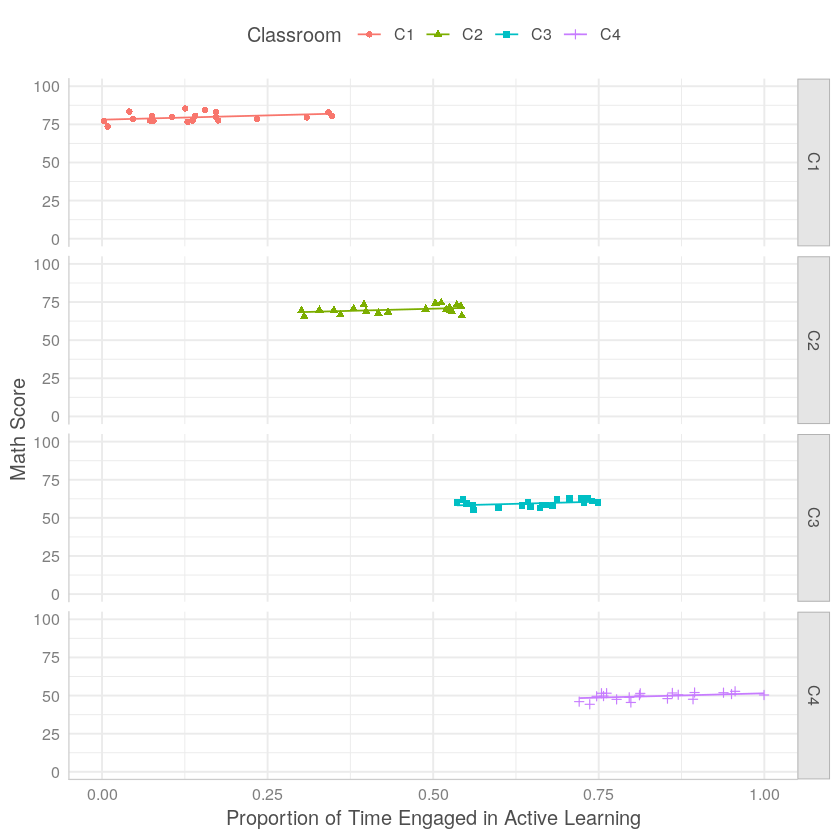

In [93]:
ClassRoom.Plot.Best <-ggplot(data = Math.Data, group=Classroom)+ 
  facet_grid(Classroom~.)+
  coord_cartesian(xlim = c(0, 1),ylim = c(0, 100))+ 
  geom_point(aes(x = ActiveTime, y=Math, 
                                   colour = Classroom, shape=Classroom))+
  geom_line(aes(x = ActiveTime, y=Model.1.Fitted.Random, 
                                  colour = Classroom))+
  xlab("Proportion of Time Engaged in Active Learning")+
  ylab("Math Score")+
  theme(legend.position = "top")
ClassRoom.Plot.Best

In [ ]:
anova(Model.Null,Model.1)


In [100]:
Math.Data$ActiveTime.C<-scale(Math.Data$ActiveTime, center=TRUE, scale=FALSE)
Model.1.GM<-lmer(Math ~ActiveTime.C+(1|Classroom),  
                   data=Math.Data, REML=FALSE)
summary(Model.1.GM)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: Math ~ ActiveTime.C + (1 | Classroom)
   Data: Math.Data

     AIC      BIC   logLik deviance df.resid 
   399.3    408.8   -195.6    391.3       76 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.13111 -0.77650 -0.04481  0.61218  2.50097 

Random effects:
 Groups    Name        Variance Std.Dev.
 Classroom (Intercept) 200.00   14.142  
 Residual                5.61    2.368  
Number of obs: 80, groups:  Classroom, 4

Fixed effects:
             Estimate Std. Error t value
(Intercept)    64.704      7.076   9.144
ActiveTime.C   11.269      3.140   3.589

Correlation of Fixed Effects:
            (Intr)
ActiveTim.C 0.000 

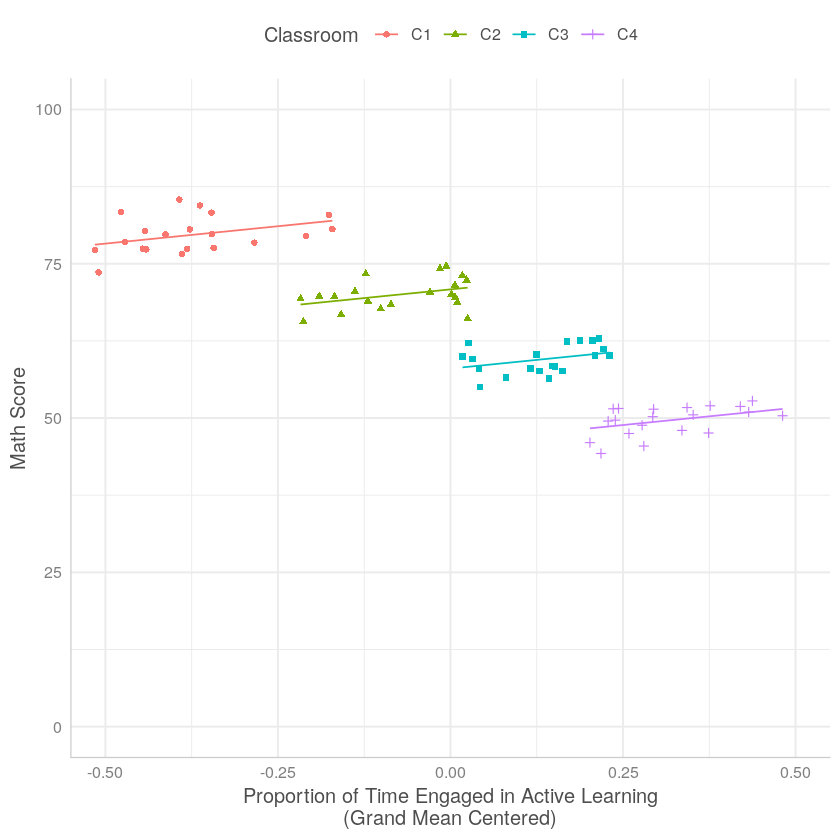

In [101]:
Math.Data$Model.1.Fitted.Random.GM<-predict(Model.1.GM) #plots fixed Random effects
     
ClassRoom.Plot.Better <-ggplot()+ 
  coord_cartesian(xlim = c(-.5,.5),ylim = c(0, 100))+ 
  geom_point(data = Math.Data, aes(x = ActiveTime.C, y=Math, 
                                   colour = Classroom, shape=Classroom))+
  geom_line(data = Math.Data, aes(x = ActiveTime.C, y=Model.1.Fitted.Random.GM, 
                                  colour = Classroom))+
  xlab("Proportion of Time Engaged in Active Learning\n(Grand Mean Centered)")+
  ylab("Math Score")+
  theme(legend.position = "top")
ClassRoom.Plot.Better

In [102]:
### Rescale IV
library(plyr)
Math.Data<-ddply(Math.Data,.(Classroom), mutate, ClassActiveTime = mean(ActiveTime))
Math.Data$ActiveTime.Class.Centered<-Math.Data$ActiveTime-Math.Data$ClassActiveTime

In [103]:
Model.1.GC<-lmer(Math ~ActiveTime.Class.Centered+(1|Classroom),  
                   data=Math.Data, REML=FALSE)
summary(Model.1.GC)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: Math ~ ActiveTime.Class.Centered + (1 | Classroom)
   Data: Math.Data

     AIC      BIC   logLik deviance df.resid 
   397.4    406.9   -194.7    389.4       76 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.16057 -0.78325 -0.04672  0.62451  2.50992 

Random effects:
 Groups    Name        Variance Std.Dev.
 Classroom (Intercept) 126.937  11.267  
 Residual                5.606   2.368  
Number of obs: 80, groups:  Classroom, 4

Fixed effects:
                          Estimate Std. Error t value
(Intercept)                 64.704      5.640  11.473
ActiveTime.Class.Centered   11.990      3.159   3.795

Correlation of Fixed Effects:
            (Intr)
ActvTm.Cl.C 0.000 

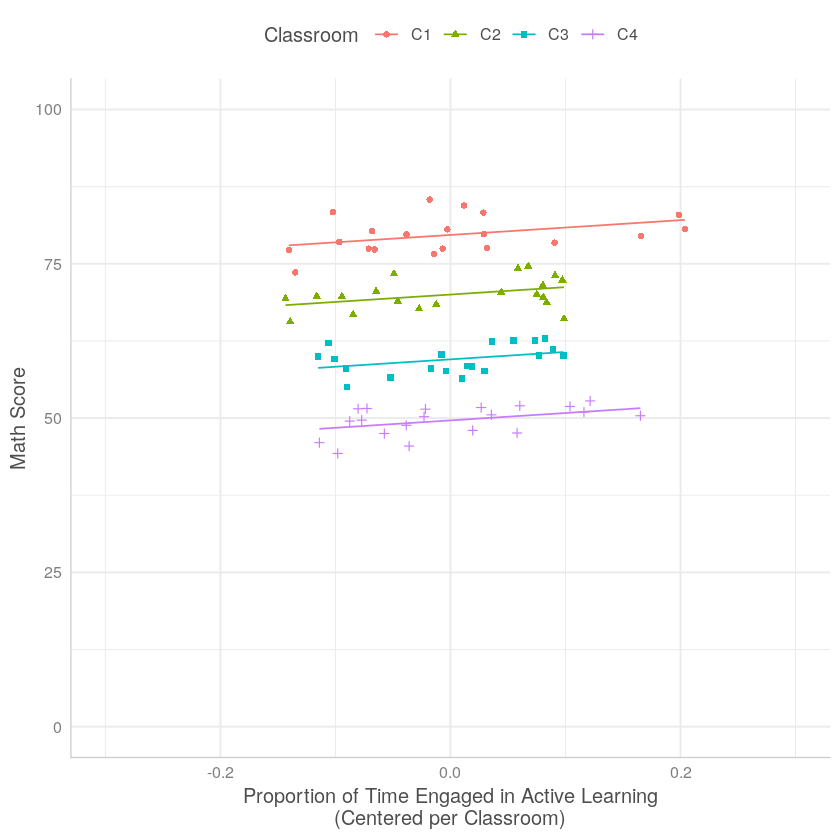

In [104]:
Math.Data$Model.1.Fitted.Random.GC<-predict(Model.1.GC) #plots fixed Random effects
     
ClassRoom.Plot.Better <-ggplot()+ 
  coord_cartesian(xlim = c(-.3,.3),ylim = c(0, 100))+ 
  geom_point(data = Math.Data, aes(x = ActiveTime.Class.Centered, y=Math, 
                                   colour = Classroom, shape=Classroom))+
  geom_line(data = Math.Data, aes(x = ActiveTime.Class.Centered, y=Model.1.Fitted.Random.GC, 
                                  colour = Classroom))+
  xlab("Proportion of Time Engaged in Active Learning\n(Centered per Classroom)")+
  ylab("Math Score")+
  theme(legend.position = "top")
ClassRoom.Plot.Better